In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv("data/creditcard_2023.csv")
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df[df.Amount < 0]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486121,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-1.109271e-14,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-3.429498e-14,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-1.209242e-14,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,3.825991e-15,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,6.288281e-15,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-2.751174e-14,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,1.240002e-14,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,8.208047e-15,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,-1.002980e-14,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [11]:
df.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

Mean: 12041.9576


<Axes: xlabel='Amount', ylabel='Density'>

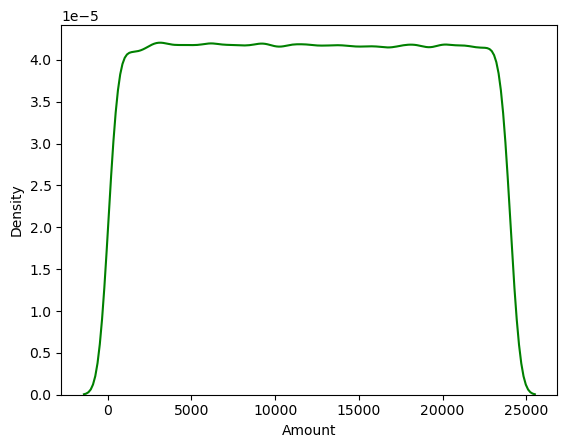

In [12]:
print(f"Mean: {df.Amount.mean():.4f}")
sns.kdeplot(df.Amount, color='green')

In [13]:
# Divide the dataframe
X = df.drop("Class", axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
225908,225908,-0.449009,0.022625,0.037981,-1.324515,0.588665,0.372568,0.642296,-0.091888,1.419073,...,0.045049,-0.359039,-0.771490,0.289691,-2.351098,-0.089947,0.505040,0.388610,0.068034,5320.96
154030,154030,1.668911,-0.638837,0.544167,-0.456377,-0.034772,0.540414,0.105985,-0.113464,2.511909,...,-0.404844,-0.137109,0.039794,0.272722,-0.758837,-1.098693,0.969224,-0.289124,-0.241501,18218.92
465602,465602,0.032668,0.406257,-0.723881,0.684595,-0.412016,-0.986514,-0.575540,0.173193,0.030685,...,0.380976,0.173895,-0.134823,0.477925,0.190953,-2.112990,0.703497,0.526982,0.426161,23104.88
276397,276397,-0.053521,-0.141561,0.251422,-1.177418,0.618298,0.977751,0.515155,0.066180,0.485225,...,-0.351188,-0.174639,-0.397476,0.131912,-2.607432,-1.064657,0.592908,0.083684,0.048762,15150.09
203835,203835,1.587085,-0.874461,-0.020762,-1.021983,0.080454,0.466595,0.179138,-0.138516,0.349438,...,0.224932,0.036482,0.680053,-0.065501,0.448057,-0.348471,-0.287637,-0.239337,-0.084888,1856.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194456,194456,1.403533,-0.796523,0.190524,-0.434843,0.032352,0.384856,0.304105,-0.149318,1.462612,...,-0.039494,0.016986,0.522140,-0.001212,1.297434,-0.419819,-0.670786,-0.244474,-0.104833,173.91
41904,41904,0.879078,-0.453747,1.092492,-0.206020,0.013993,0.493294,0.278600,-0.089529,0.624241,...,-0.342899,-0.089079,-0.016117,0.072803,0.364709,0.164277,-1.266953,-0.177195,-0.035022,18039.40
435008,435008,-1.331175,1.220232,-1.536811,1.731368,-1.667160,-1.750242,-1.558718,1.319443,-1.520769,...,-0.629974,0.750333,0.119745,-0.378679,1.212643,-0.400501,0.324010,-0.384310,-0.454072,6096.10
425933,425933,-2.597709,3.293113,-2.483545,1.278816,-3.234542,-2.870210,-2.441231,5.757249,-1.061926,...,1.493179,0.573945,-1.863313,-1.339134,0.384069,3.699769,-0.485396,1.527129,0.786128,7623.88
